In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in the csv
airbnb_df = pd.read_csv('listings_clean_nan.csv')
airbnb_df.head()

,Unnamed: 0,source,name,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,city scrape,Home in Kapaau · ★4.94 · Studio · 1 bed · 1 bath,31314577,https://www.airbnb.com/users/show/31314577,Marc,4/16/2015,"Waimea, HI",within an hour,100%,...,4.81,5.0,4.88,4.88,4.81,f,4,4,0,1.41
1,1,city scrape,Rental unit in Pahala · ★4.56 · 2 bedrooms · 2...,13268454,https://www.airbnb.com/users/show/13268454,Madaline,3/18/2014,"San Francisco, CA",a few days or more,0%,...,4.56,5.0,4.78,4.33,4.44,f,1,1,0,0.09
2,2,city scrape,Cabin in Mountain View · 1 bedroom · 2 beds · ...,251605183,https://www.airbnb.com/users/show/251605183,Kathleen,3/27/2019,"Kurtistown, HI",within an hour,100%,...,NaN,NaN,NaN,NaN,NaN,t,3,1,2,NaN
3,3,city scrape,Home in Kailua-Kona · 2 bedrooms · 3 beds · 1 ...,504489199,https://www.airbnb.com/users/show/504489199,Kelly And Zain,3/8/2023,"Kailua-Kona, HI",within an hour,100%,...,NaN,NaN,NaN,NaN,NaN,f,3,3,0,NaN
4,4,city scrape,Rental unit in Waikoloa Village · ★New · 1 bed...,336576760,https://www.airbnb.com/users/show/336576760,Tim,2/16/2020,"Myrtle Beach, SC",within a few hours,97%,...,NaN,NaN,NaN,NaN,NaN,f,79,79,0,NaN


In [3]:
# Look at the shape
airbnb_df.shape

(34040, 61)

In [4]:
# Look at what would drop
airbnb_df.dropna().shape

(0, 61)

In [5]:
# Look at the columns
airbnb_df.columns

Index(['Unnamed: 0', 'source', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of

In [6]:
# #Create a Data Frame with needed columns for ML algorithm - Original Columns kept
# airbnb_sh_df = airbnb_df [['host_response_rate','host_acceptance_rate',
#             'host_is_superhost','host_identity_verified','price',
#             'review_scores_rating','instant_bookable','reviews_per_month']]
# airbnb_sh_df.head()

In [7]:
# Create a Data Frame with needed columns for ML algorithm - Added host_id
airbnb_sh_df = airbnb_df [['host_id','host_response_rate','host_acceptance_rate',
            'host_is_superhost','host_identity_verified','price',
            'review_scores_rating','instant_bookable','reviews_per_month']]


In [8]:
# Look at the counts
airbnb_sh_df.count()

host_id                   34040
host_response_rate        31487
host_acceptance_rate      32403
host_is_superhost         34018
host_identity_verified    34038
price                     32748
review_scores_rating      25869
instant_bookable          34040
reviews_per_month         25858
dtype: int64

In [9]:
# Drop the NA's
# airbnb_sh_df_dna.dropna(inplace=True)
airbnb_sh_df_dna = airbnb_sh_df.dropna()

In [10]:
# Look at the counts after dropping the NA's
airbnb_sh_df_dna.count()

host_id                   23548
host_response_rate        23548
host_acceptance_rate      23548
host_is_superhost         23548
host_identity_verified    23548
price                     23548
review_scores_rating      23548
instant_bookable          23548
reviews_per_month         23548
dtype: int64

In [11]:
#Look at datatypes
airbnb_sh_df_dna.dtypes

host_id                     int64
host_response_rate         object
host_acceptance_rate       object
host_is_superhost          object
host_identity_verified     object
price                      object
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
dtype: object

In [12]:
# Look at shape
airbnb_sh_df_dna.shape

(23548, 9)

In [13]:
# Look at the Dataframe
airbnb_sh_df_dna

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,price,review_scores_rating,instant_bookable,reviews_per_month
0,31314577,100%,98%,t,t,$175.00,4.94,f,1.41
1,13268454,0%,0%,f,f,$225.00,4.56,f,0.09
6,33033151,100%,100%,t,f,$800.00,4.82,t,0.51
7,165432276,100%,100%,t,t,$500.00,4.85,t,0.91
8,18613890,100%,100%,t,t,$125.00,4.96,f,2.74
...,...,...,...,...,...,...,...,...,...
34034,92715155,89%,99%,f,f,$288.00,4.81,t,1.35
34035,132087088,100%,99%,f,t,$292.00,5.00,f,0.13
34036,382903817,100%,98%,t,t,$345.00,5.00,t,1.72
34038,114753799,100%,100%,f,t,$600.00,5.00,f,0.59


In [14]:
# Convert host response rate to integer
airbnb_sh_df_dna.host_response_rate = airbnb_sh_df_dna.host_response_rate.str.replace('%','').astype('int')

<ipython-input-14-54c2f90b8817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna.host_response_rate = airbnb_sh_df_dna.host_response_rate.str.replace('%','').astype('int')


In [15]:
# Convert host acceptance rate to integer
airbnb_sh_df_dna.host_acceptance_rate = airbnb_sh_df_dna.host_acceptance_rate.str.replace('%','').astype('int')

<ipython-input-15-f5f00195ee1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna.host_acceptance_rate = airbnb_sh_df_dna.host_acceptance_rate.str.replace('%','').astype('int')


In [16]:
# Convert price to float
airbnb_sh_df_dna['price'] = airbnb_sh_df_dna['price'].str.replace('$', '').str.replace(',', '').astype('float64')

<ipython-input-16-8c748fc9adf3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_sh_df_dna['price'] = airbnb_sh_df_dna['price'].str.replace('$', '').str.replace(',', '').astype('float64')
<ipython-input-16-8c748fc9adf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['price'] = airbnb_sh_df_dna['price'].str.replace('$', '').str.replace(',', '').astype('float64')


In [17]:
# Encode Super Host column
airbnb_sh_df_dna['host_is_superhost'] = airbnb_sh_df_dna['host_is_superhost'].replace({'t': 1, 'f': 0})

<ipython-input-17-7d0b6d9b1c51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['host_is_superhost'] = airbnb_sh_df_dna['host_is_superhost'].replace({'t': 1, 'f': 0})


In [18]:
# Encode Host Identity column
airbnb_sh_df_dna['host_identity_verified'] = airbnb_sh_df_dna['host_identity_verified'].replace({'t': 1, 'f': 0})

<ipython-input-18-02b13476c36a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['host_identity_verified'] = airbnb_sh_df_dna['host_identity_verified'].replace({'t': 1, 'f': 0})


In [19]:
# Encode Instant Bookable column
airbnb_sh_df_dna['instant_bookable'] = airbnb_sh_df_dna['instant_bookable'].replace({'t': 1, 'f': 0})

<ipython-input-19-1f76a0b049e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['instant_bookable'] = airbnb_sh_df_dna['instant_bookable'].replace({'t': 1, 'f': 0})


In [20]:
# View Updated Data Frame
airbnb_sh_df_dna

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,price,review_scores_rating,instant_bookable,reviews_per_month
0,31314577,100,98,1,1,175.0,4.94,0,1.41
1,13268454,0,0,0,0,225.0,4.56,0,0.09
6,33033151,100,100,1,0,800.0,4.82,1,0.51
7,165432276,100,100,1,1,500.0,4.85,1,0.91
8,18613890,100,100,1,1,125.0,4.96,0,2.74
...,...,...,...,...,...,...,...,...,...
34034,92715155,89,99,0,0,288.0,4.81,1,1.35
34035,132087088,100,99,0,1,292.0,5.00,0,0.13
34036,382903817,100,98,1,1,345.0,5.00,1,1.72
34038,114753799,100,100,0,1,600.0,5.00,0,0.59


In [21]:
#Look at datatypes
airbnb_sh_df_dna.dtypes

host_id                     int64
host_response_rate          int64
host_acceptance_rate        int64
host_is_superhost           int64
host_identity_verified      int64
price                     float64
review_scores_rating      float64
instant_bookable            int64
reviews_per_month         float64
dtype: object

In [22]:
# Bin the Host ID's
# host_id_count = airbnb_sh_df_dna.host_id.value_counts()
# for id in host_id_count[host_id_count<50].index:
  # airbnb_sh_df_dna.host_id = airbnb_sh_df_dna.host_id.replace(id,'other')
#airbnb_sh_df_dna.nunique()

In [23]:
# Create variable to bin host id
h_counts = airbnb_sh_df_dna.host_id.value_counts()

In [24]:
# Look at host id index
h_counts[h_counts<50].index

Int64Index([156373103, 195864879, 428576478, 146182295, 457152913,    733802,
               677327, 366621778,  42705922,  28035243,
            ...
            190371818, 149854292, 146178668, 167595816,    361961, 134837911,
             83199033,   2732545,    328451, 114753799],
           dtype='int64', length=6857)

In [25]:
# Bin Host ID's - Choose a cutoff value and create a list of host id to be replaced
# use the variable name `hostid_to_replace`
host_id_to_replace = h_counts[h_counts<50].index

# Replace in dataframe
for hostid in host_id_to_replace:
    airbnb_sh_df_dna['host_id'] = airbnb_sh_df_dna['host_id'].replace(hostid,"other")

# Check to make sure binning was successful
airbnb_sh_df_dna['host_id'].value_counts()

<ipython-input-25-231e838f9375>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_sh_df_dna['host_id'] = airbnb_sh_df_dna['host_id'].replace(hostid,"other")


other        16490
22635145       330
113441705      326
39073224       317
111808435      285
             ...  
186952542       54
116465695       53
444732174       52
34024330        51
118578746       50
Name: host_id, Length: 61, dtype: int64

In [26]:
# Look at unique values
airbnb_sh_df_dna.nunique()

host_id                     61
host_response_rate          56
host_acceptance_rate        95
host_is_superhost            2
host_identity_verified       2
price                     1518
review_scores_rating       145
instant_bookable             2
reviews_per_month          738
dtype: int64

In [27]:
#Look at datatypes
airbnb_sh_df_dna.dtypes

host_id                    object
host_response_rate          int64
host_acceptance_rate        int64
host_is_superhost           int64
host_identity_verified      int64
price                     float64
review_scores_rating      float64
instant_bookable            int64
reviews_per_month         float64
dtype: object

In [28]:
# view the host id counts
airbnb_sh_df_dna.host_id.value_counts()

other        16490
22635145       330
113441705      326
39073224       317
111808435      285
             ...  
186952542       54
116465695       53
444732174       52
34024330        51
118578746       50
Name: host_id, Length: 61, dtype: int64

In [29]:
# view the price counts
price_count = airbnb_sh_df_dna.price.value_counts()

In [30]:
# view teh price counts over 50
price_count[price_count >50]

100.0    205
200.0    201
199.0    185
225.0    184
125.0    184
        ... 
141.0     51
499.0     51
248.0     51
202.0     51
143.0     51
Name: price, Length: 153, dtype: int64

In [31]:
# View Updated Data Frame
airbnb_sh_df_dna

,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,price,review_scores_rating,instant_bookable,reviews_per_month
0,other,100,98,1,1,175.0,4.94,0,1.41
1,other,0,0,0,0,225.0,4.56,0,0.09
6,other,100,100,1,0,800.0,4.82,1,0.51
7,other,100,100,1,1,500.0,4.85,1,0.91
8,other,100,100,1,1,125.0,4.96,0,2.74
...,...,...,...,...,...,...,...,...,...
34034,92715155,89,99,0,0,288.0,4.81,1,1.35
34035,132087088,100,99,0,1,292.0,5.00,0,0.13
34036,382903817,100,98,1,1,345.0,5.00,1,1.72
34038,other,100,100,0,1,600.0,5.00,0,0.59


In [32]:
# Convert categorical data to numeric with `pd.get_dummies`
abnb_dummies_df = pd.get_dummies(airbnb_sh_df_dna)
abnb_dummies_df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,price,review_scores_rating,instant_bookable,reviews_per_month,host_id_680107,host_id_756093,...,host_id_371942068,host_id_382903817,host_id_389697794,host_id_402998583,host_id_411546857,host_id_429407284,host_id_444732174,host_id_451239593,host_id_482174715,host_id_other
0,100,98,1,1,175.0,4.94,0,1.41,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,225.0,4.56,0,0.09,0,0,...,0,0,0,0,0,0,0,0,0,1
6,100,100,1,0,800.0,4.82,1,0.51,0,0,...,0,0,0,0,0,0,0,0,0,1
7,100,100,1,1,500.0,4.85,1,0.91,0,0,...,0,0,0,0,0,0,0,0,0,1
8,100,100,1,1,125.0,4.96,0,2.74,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34034,89,99,0,0,288.0,4.81,1,1.35,0,0,...,0,0,0,0,0,0,0,0,0,0
34035,100,99,0,1,292.0,5.00,0,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0
34036,100,98,1,1,345.0,5.00,1,1.72,0,0,...,0,1,0,0,0,0,0,0,0,0
34038,100,100,0,1,600.0,5.00,0,0.59,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Look at datatypes
abnb_dummies_df.dtypes

host_response_rate          int64
host_acceptance_rate        int64
host_is_superhost           int64
host_identity_verified      int64
price                     float64
                           ...   
host_id_429407284           uint8
host_id_444732174           uint8
host_id_451239593           uint8
host_id_482174715           uint8
host_id_other               uint8
Length: 69, dtype: object

In [34]:
# Look at the dummies_df columns
abnb_dummies_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'price', 'review_scores_rating',
       'instant_bookable', 'reviews_per_month', 'host_id_680107',
       'host_id_756093', 'host_id_5786717', 'host_id_10548519',
       'host_id_14143158', 'host_id_15820446', 'host_id_18476866',
       'host_id_20704144', 'host_id_21265745', 'host_id_22635145',
       'host_id_34024330', 'host_id_37839136', 'host_id_39073224',
       'host_id_40240788', 'host_id_41842769', 'host_id_42612930',
       'host_id_43068394', 'host_id_43793840', 'host_id_47208806',
       'host_id_48697898', 'host_id_49441399', 'host_id_51017586',
       'host_id_52042236', 'host_id_57940735', 'host_id_61304968',
       'host_id_69552498', 'host_id_71362662', 'host_id_74079684',
       'host_id_92715155', 'host_id_96255708', 'host_id_97006413',
       'host_id_98570220', 'host_id_101401250', 'host_id_107293305',
       'host_id_111808435', 'host_id_113441705', 'host_id_

In [35]:
# Remove Super Host target from features data
y = abnb_dummies_df.host_is_superhost.values
X = abnb_dummies_df.drop(columns="host_is_superhost").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [36]:
# Preprocess numerical data for the neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# View X to confirm the data scaled
X_train_scaled

array([[-2.75855619e-01, -2.26919523e+00,  3.59572182e-01, ...,
        -6.12459439e-02,  1.71274633e+01, -1.52429824e+00],
       [ 2.45606059e-01,  3.13850635e-01,  3.59572182e-01, ...,
        -6.12459439e-02, -5.83857621e-02,  6.56039594e-01],
       [ 2.45606059e-01,  4.33992303e-01,  3.59572182e-01, ...,
        -6.12459439e-02, -5.83857621e-02, -1.52429824e+00],
       ...,
       [ 2.45606059e-01,  3.73921469e-01,  3.59572182e-01, ...,
        -6.12459439e-02, -5.83857621e-02,  6.56039594e-01],
       [ 2.45606059e-01,  3.73921469e-01,  3.59572182e-01, ...,
        -6.12459439e-02, -5.83857621e-02, -1.52429824e+00],
       [-1.51247803e-02,  3.73921469e-01,  3.59572182e-01, ...,
        -6.12459439e-02, -5.83857621e-02, -1.52429824e+00]])

# Compile, Train and Evaluate the Model - Attempt 7

In [38]:
# Look at the length of the columns
len(X_train[0])

68

In [39]:
# Define the deep learning model
nn_model2 = tf.keras.models.Sequential()
nn_model2.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=68))
nn_model2.add(tf.keras.layers.Dense(units=40, activation="relu"))
nn_model2.add(tf.keras.layers.Dense(units=60, activation="relu"))
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
552/552 [==============================] - 3s 2ms/step - loss: 0.4388 - accuracy: 0.7772
Epoch 2/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3803 - accuracy: 0.8060
Epoch 3/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3767 - accuracy: 0.8103
Epoch 4/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8096
Epoch 5/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3720 - accuracy: 0.8111
Epoch 6/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8108
Epoch 7/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8122
Epoch 8/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8117
Epoch 9/50
552/552 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8147
Epoch 10/50
552/552 [==============================] - 2s 3ms/step - loss: 0.3676 - accuracy: 0.8133

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

184/184 - 0s - loss: 0.3532 - accuracy: 0.8206 - 249ms/epoch - 1ms/step
Loss: 0.35321202874183655, Accuracy: 0.8206217288970947


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Train the Random Forest classifier
rf.fit(X_train, y_train)
# Evaluate the Random Forest classifier
y_pred = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', accuracy_rf)

Accuracy of the Random Forest classifier: 0.8464413113640225


Text(0.5, 1.0, 'Random Tree - Feature Importances')

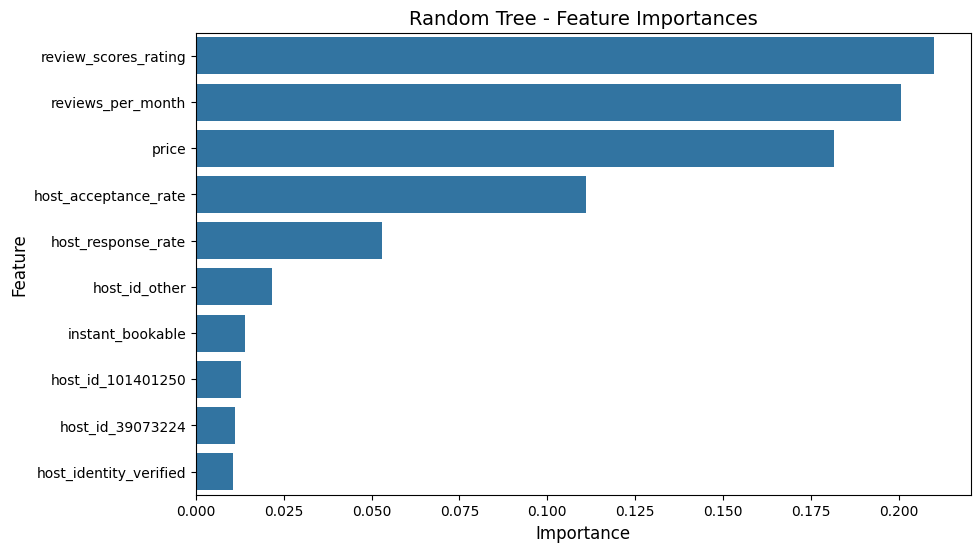

In [63]:
# Create a bar chart featuring the top 10 most important features
plt.figure(figsize=(10,6))
importances = rf.feature_importances_
features = abnb_dummies_df.drop(columns="host_is_superhost").columns
indices = np.argsort(importances)[::-1]
g = sns.barplot(x=importances[indices][:10], y=features[indices][:10], orient='h')
g.set_xlabel("Importance", fontsize=12)
g.set_ylabel("Feature", fontsize=12)
g.tick_params(axis="both", which="major", labelsize=10)
plt.title("Random Tree - Feature Importances", fontsize=14)
